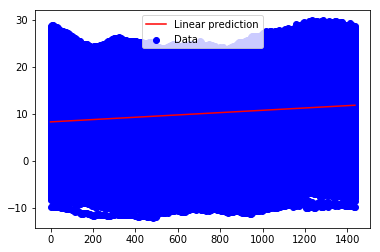

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()